In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data_seleccion = pd.read_csv('data_desafio2_final.csv',sep = ',', index_col= 'Unnamed: 0')
data_seleccion.head(3)

,place_name,price_usd_per_m2,surface_total_in_m2,lat,lon,floor,rooms,description,title,avenida,...,terraza,lavadero,Belgrano,Nuñez,Palermo,Palermo Hollywood,Recoleta,surface_total_in_m2_2,distancia_obelisco,habitaciones
7,Belgrano,3066.666667,45.0,-34.559873,-58.443362,NaN,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,1,...,1,1,1,0,0,0,0,2025.0,7344.73363,NaN
8,Belgrano,3000.000000,65.0,-34.559873,-58.443362,NaN,2.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",1,...,1,1,1,0,0,0,0,4225.0,7344.73363,NaN
19,Palermo,3365.384615,104.0,-34.580504,-58.405874,NaN,3.0,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",0,...,1,0,0,0,1,0,0,10816.0,3029.00720,NaN


In [ ]:
data_seleccion.shape

(3884, 28)

Regresión Lineal Simple

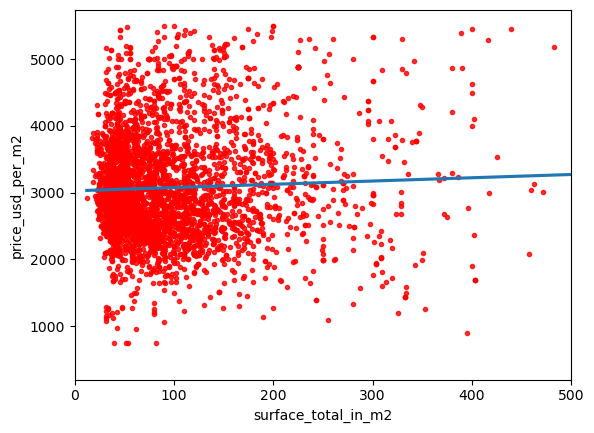

In [ ]:
sns.regplot(data = data_seleccion, x="surface_total_in_m2", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,500)
plt.ylim(bottom=200);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
#Modelo de regresión simple con la superficie en metros cuadrados como variable explicativa
#Utilizamos la librería sklearn

feature_cols = ['surface_total_in_m2']
X = data_seleccion[feature_cols]
y = data_seleccion.price_usd_per_m2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 610.2696202176725
MSE: 628250.6111307758
RMSE: 792.6226158335224
R2: -0.0053886639427254135


In [ ]:
import statsmodels.api as sm

In [ ]:
#Corremos el mismo modelo, ahora con la librería statsmodels

feature_cols = ['surface_total_in_m2']

X = data_seleccion[feature_cols]

y = data_seleccion.price_usd_per_m2

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.497
Date:                Thu, 19 Jan 2023   Prob (F-statistic):            0.00358
Time:                        16:46:15   Log-Likelihood:                -31349.
No. Observations:                3884   AIC:                         6.270e+04
Df Residuals:                    3882   BIC:                         6.272e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3028.3347    

Regresión Lineal Múltiple

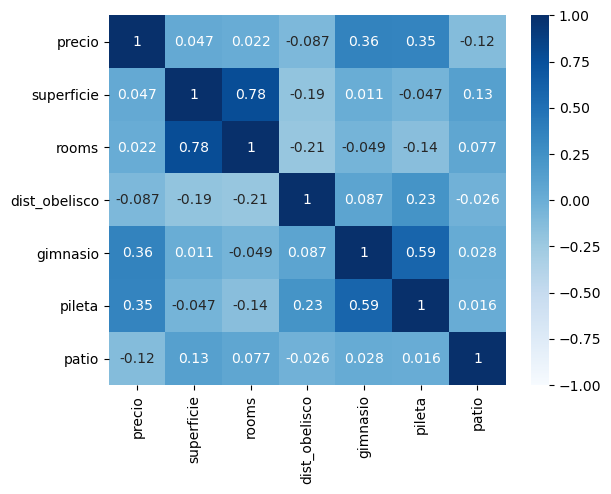

In [ ]:
#Analizamos la correlación que existe entre algunas de las variables
columnas_correlacion= ['price_usd_per_m2','surface_total_in_m2','rooms','distancia_obelisco','gimnasio','pileta','patio']
data_correlacion=data_seleccion[columnas_correlacion]
data_correlacion.rename(columns={'price_usd_per_m2':'precio','surface_total_in_m2':'superficie','distancia_obelisco':'dist_obelisco'},inplace=True)
sns.heatmap(data_correlacion.corr(), annot=True, vmin=-1, cmap='Blues');

In [ ]:
#Modelo de regresión múltiple con statsmodels

feature_cols = ['surface_total_in_m2','rooms','distancia_obelisco','lat','lon','avenida','balcon','gimnasio','SUM','cochera','parrilla','pileta','patio','terraza','lavadero','Belgrano','Palermo','Nuñez','Palermo Hollywood','Recoleta']

X = data_seleccion[feature_cols]

y = data_seleccion.price_usd_per_m2

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

##

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     96.66
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          2.31e-321
Time:                        16:46:17   Log-Likelihood:                -30566.
No. Observations:                3884   AIC:                         6.117e+04
Df Residuals:                    3863   BIC:                         6.130e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.058e+06   2

In [ ]:
#Modelo de regresión múltiple con sklearn

feature_cols = ['surface_total_in_m2','rooms','distancia_obelisco','lat','lon','avenida','balcon','gimnasio','SUM','cochera','parrilla','pileta','patio','terraza','lavadero','Belgrano','Palermo','Nuñez','Palermo Hollywood','Recoleta']
X = data_seleccion[feature_cols]
y = data_seleccion.price_usd_per_m2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 506.77636423869956
MSE: 426306.5979076797
RMSE: 652.9215863391864
R2: 0.31778208678709396


Regularización

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
#Normalizamos las features continuas previo a regularizar nuestro modelo
from sklearn import preprocessing

In [ ]:
#Seleccionamos las variables continuas para luego normalizarlas
data_seleccion_L1 = data_seleccion.loc[:,['price_usd_per_m2',"surface_total_in_m2","rooms","distancia_obelisco","lat","lon"]]

In [ ]:
data_seleccion_L1 = preprocessing.normalize(data_seleccion_L1, norm='l1', axis=0)

In [ ]:
data_seleccion_L1

array([[ 2.56756006e-04,  1.20890398e-04,  8.88494003e-05,
         3.62379977e-04, -2.57327571e-04, -2.57543081e-04],
       [ 2.51174354e-04,  1.74619464e-04,  1.77698801e-04,
         3.62379977e-04, -2.57327571e-04, -2.57543081e-04],
       [ 2.81766102e-04,  2.79391142e-04,  2.66548201e-04,
         1.49447429e-04, -2.57481184e-04, -2.57377885e-04],
       ...,
       [ 1.70336631e-04,  7.79071454e-05,  8.88494003e-05,
         9.73560234e-05, -2.57604996e-04, -2.57347338e-04],
       [ 2.40801372e-04,  3.03569222e-04,  3.55397601e-04,
         9.55663039e-05, -2.57556571e-04, -2.57341154e-04],
       [ 3.13967943e-04,  1.18203945e-04,  8.88494003e-05,
         9.87800345e-05, -2.57532723e-04, -2.57340418e-04]])

In [ ]:
#Creamos un dataframe con base en el array de las variables estandarizadas
data_L1 = pd.DataFrame(data_seleccion_L1, index=data_seleccion.index, columns=['price_usd_per_m2',"surface_total_in_m2","rooms","distancia_obelisco","lat","lon"])

In [ ]:
data_L1.head(3)

,price_usd_per_m2,surface_total_in_m2,rooms,distancia_obelisco,lat,lon
7,0.000257,0.000121,0.000089,0.000362,-0.000257,-0.000258
8,0.000251,0.000175,0.000178,0.000362,-0.000257,-0.000258
19,0.000282,0.000279,0.000267,0.000149,-0.000257,-0.000257


In [ ]:
#Guardamos las variables dicotómicas en otro dataframe para mergear con las continuas
data_seleccion_dummys = data_seleccion.loc[:,['avenida','balcon','gimnasio','SUM','cochera','parrilla','pileta','patio','terraza','lavadero','Belgrano','Palermo','Nuñez','Palermo Hollywood','Recoleta']]

In [ ]:
data_seleccion_normalized=pd.concat([data_L1,data_seleccion_dummys], axis=1)

In [ ]:
data_seleccion_normalized.head()

,price_usd_per_m2,surface_total_in_m2,rooms,distancia_obelisco,lat,lon,avenida,balcon,gimnasio,SUM,...,parrilla,pileta,patio,terraza,lavadero,Belgrano,Palermo,Nuñez,Palermo Hollywood,Recoleta
7,0.000257,0.000121,0.000089,0.000362,-0.000257,-0.000258,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0
8,0.000251,0.000175,0.000178,0.000362,-0.000257,-0.000258,1,0,0,0,...,0,1,0,1,1,1,0,0,0,0
19,0.000282,0.000279,0.000267,0.000149,-0.000257,-0.000257,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
21,0.000192,0.000317,0.000355,0.000169,-0.000258,-0.000257,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
60,0.000290,0.000134,0.000178,0.000431,-0.000257,-0.000258,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
#Volvemos a correr nuestro modelo en sklearn, ahora con el dataset con las variables normalizadas

feature_cols = ['surface_total_in_m2','distancia_obelisco',"rooms",'lat','lon','avenida','balcon','gimnasio','SUM','cochera','parrilla','pileta','patio','terraza','lavadero','Belgrano','Palermo','Nuñez','Palermo Hollywood','Recoleta']
X = data_seleccion_normalized[feature_cols]
y = data_seleccion_normalized.price_usd_per_m2
    # Como estamos trabajando con observaciones ordenadas en el tiempo, ponemos
    # shuffle=False para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 4.2429741999919904e-05
MSE: 2.9883408619683848e-09
RMSE: 5.4665719257761395e-05
R2: 0.3177820868033866


In [ ]:
# Ajustamos el modelo usando aplicando regularización con distintos valores de penalización

lm_ridge = RidgeCV(alphas=[0.1,0.5,1,5,10], normalize=True) 
# Definimos el rango de de búsqueda del hiperparametro explicitamente

model_2 = lm_ridge.fit(X_train, y_train)

print('Score model_Ridge:', model_2.score(X_test, y_test))
print ("alpha:", lm_ridge.alpha_)

Score model_Ridge: 0.29415948535853376
alpha: 0.1
